### Perceptrons

Warren McCulloch and Walter Pitts published the first concept of a simplified brain cell, the so-called McCulloch-Pitts (MCP) neuron, in 1943 *(A Logical Calculus of the Ideas Immanent in Nervous Activity, W. S. McCulloch and W. Pitts, Bulletin of Mathematical Biophysics, 5(4): 115-133, 1943).*


![img](0neuron.png)


Only a few years later, Frank Rosenblatt published the first concept of the perceptron
learning rule based on the MCP neuron model (The Perceptron: A Perceiving and
Recognizing Automaton, F. Rosenblatt, Cornell Aeronautical Laboratory, 1957). 

With his
perceptron rule, Rosenblatt proposed an algorithm that would automatically learn
the optimal weight coefficients that are then multiplied with the input features
in order to make the decision of whether a neuron fires or not.

In the context of
supervised learning and classification, such an algorithm could then be used to
predict if a sample belongs to one class or the other.


![formalpt](0formalpt.png)

![diagram](https://i.stack.imgur.com/1iiUx.png)

![forsimp](0forsimplicity.png)

![img](0boundary.png)

In [1]:
phi = lambda z: (z >= 0)*2 -1

phi(-12),phi(0),phi(213)

(-1, 1, 1)

In [2]:
import numpy as np

np.random.seed(420)
w = np.random.randn(3)
x = np.array([1,2,3])
w.T@x, phi(w.T@x)

(-5.874363935509676, -1)

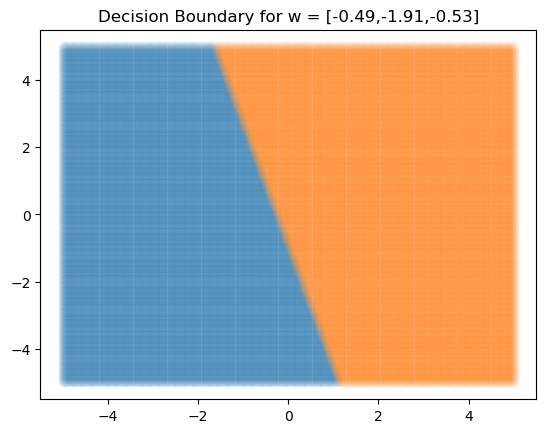

In [3]:
import matplotlib.pyplot as plt

def plot_boundary(w,title="",X=np.empty([0,3]),y=[]):
    xaxis = np.linspace(-5,5,200)
    yaxis = np.linspace(-5,5,200)

    positive = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] >=0]
    negative = [(a,b) for a in xaxis for b in yaxis if w.T@[1,a,b] < 0]

    positive,negative = np.array(positive),np.array(negative)
    plt.scatter(positive[:,0],positive[:,1],alpha=0.05)
    plt.scatter(negative[:,0],negative[:,1],alpha=0.05)
    plt.title(title)
    if len(y)==0:
        plt.scatter(X[:,1],X[:,2],c="black")
    else:
        assert(set(y)==set([-1,1]))
        Xpos,Xneg = X[y==1],X[y==-1]
        plt.scatter(Xpos[:,1],Xpos[:,2],c="black",marker="P")
        plt.scatter(Xneg[:,1],Xneg[:,2],c="black",marker="_")
    plt.show()

title = f"Decision Boundary for w = [{w[0]:0.2f},{w[1]:0.2f},{w[2]:0.2f}]"
plot_boundary(w,title = f"Decision Boundary for w = [{w[0]:0.2f},{w[1]:0.2f},{w[2]:0.2f}]")

### Making Predictions

For now let us assume that we have somehow found a good set of weights `w` for our perceptron.

For each data point ${\bf x}^{(i)}$ we will do *binary classification*, assigning the point to one of two classes: 

* Class 1 if $\phi({\bf w}^T{\bf x}^{(i)}) = 1$
* Class 2 if $\phi({\bf w}^T{\bf x}^{(i)}) = -1$

The actual meanings of Class 1 and Class 2 will depend on the problem.

The Perceptron Learning Algorithm adjusts $w$ in an iterative way until it classifies the training data with high accuracy.

If the data is *linearly separable* then the PLA will always achieve a perfect separation.

![linsep](0linsep.png)


### Bulk Prediction

Notice that if you have a data matrix $X$ (with bias column), then


$$X{\bf w} = 
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)}\\
1 & x_1^{(2)} & x_2^{(2)}\\
 & \vdots &  \\
1 & x_1^{(n)} & x_2^{(n)}
\end{bmatrix} 
\begin{bmatrix}
w_0\\
w_1 \\
w_2
\end{bmatrix}=
\begin{bmatrix}
{\bf w}^T {\bf x}^{(1)} \\
{\bf w}^T {\bf x}^{(2)} \\
{\bf w}^T {\bf x}^{(3)} 
\end{bmatrix}
$$

And with numpy broadcasting you can easily produce a prediction vector $\hat{y}$

$$\hat{y}=\phi(X{\bf w}) = 
\begin{bmatrix}
\phi({\bf w}^T {\bf x}^{(1)}) \\
\phi({\bf w}^T {\bf x}^{(2)}) \\
\phi({\bf w}^T {\bf x}^{(3)}) 
\end{bmatrix}
$$



In [4]:
## Some artificial data
X = (np.random.rand(20).reshape(10,2) - 1/2)*10
X

array([[ 3.68166479,  1.29728518],
       [-1.47481292, -4.32462401],
       [ 1.26350592,  0.9866086 ],
       [-4.07782749, -4.43148449],
       [-2.628678  , -2.6459633 ],
       [ 2.74371382, -4.57398869],
       [-1.45304721, -0.30833396],
       [ 2.6757992 ,  3.63516638],
       [ 2.77620476, -2.74099844],
       [ 2.60389215, -0.58614629]])

In [5]:
## Adding a bias column
X = np.c_[np.ones(X.shape[0]),X]
X

array([[ 1.        ,  3.68166479,  1.29728518],
       [ 1.        , -1.47481292, -4.32462401],
       [ 1.        ,  1.26350592,  0.9866086 ],
       [ 1.        , -4.07782749, -4.43148449],
       [ 1.        , -2.628678  , -2.6459633 ],
       [ 1.        ,  2.74371382, -4.57398869],
       [ 1.        , -1.45304721, -0.30833396],
       [ 1.        ,  2.6757992 ,  3.63516638],
       [ 1.        ,  2.77620476, -2.74099844],
       [ 1.        ,  2.60389215, -0.58614629]])

In [6]:
X@w

array([-8.18218843,  4.60006607, -3.41173896,  9.6154416 ,  5.91500872,
       -3.30565524,  2.44513968, -7.49610376, -4.33211491, -5.13776305])

In [7]:
yhat = phi(X@w)
yhat

array([-1,  1, -1,  1,  1, -1,  1, -1, -1, -1])

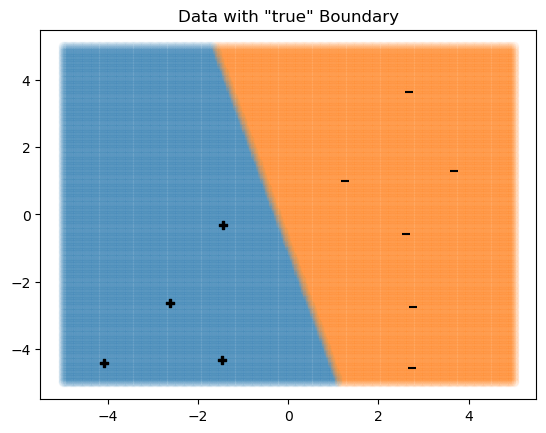

In [8]:
plot_boundary(w,X=X,y=yhat,title='Data with "true" Boundary')


### Artificial Data

Let us now "forget" ${\bf w}$ and try to relearn it using the Perceptron Learning Algorithm on the data $X$.

First we will officially make the current boundary the target.

$y = \phi(X{\bf w})$

Then we will initialize ${\bf w}$ to be random.


In [9]:
y = phi(X@w)
w = np.random.randn(3)
y,w

(array([-1,  1, -1,  1,  1, -1,  1, -1, -1, -1]),
 array([-0.31354602,  0.54680904, -1.284877  ]))

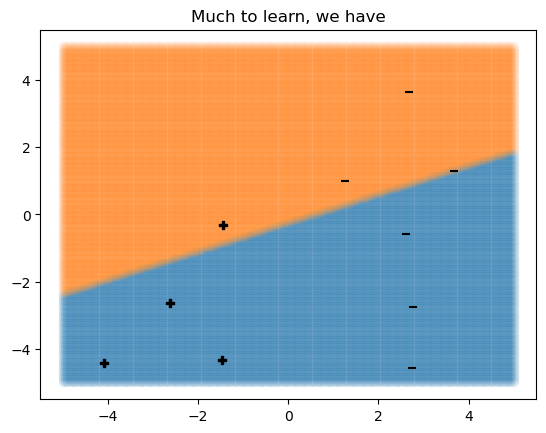

In [10]:
plot_boundary(w,X=X,y=y,title="Much to learn, we have")

### Training phase

We now want to use the data we have to "train" ${\bf w}$ so that it makes a boundary that works for $X$.

We want the "-" points to be in the orange and the "+" points to be in the blue.

We compute a new prediction vector $\hat{y}$, based on our new ${\bf w}$


In [11]:
yhat = phi(X@w)
yhat,y

(array([ 1,  1, -1,  1,  1,  1, -1, -1,  1,  1]),
 array([-1,  1, -1,  1,  1, -1,  1, -1, -1, -1]))

### The PLA

Let's see what the book says about how the PLA works...

![pla](0pla.png)

In [12]:
## Manual PLA, Naive
eta = 0.5
for x,y_i in zip(X,y):
    yhat = phi(w.T@x)
    dw_0 = eta*(y_i-yhat)*x[0]
    dw_1 = eta*(y_i-yhat)*x[1]
    dw_2 = eta*(y_i-yhat)*x[2]
    
    w[0] += dw_0
    w[1] += dw_1
    w[2] += dw_2
    
    

In [13]:
yhat = phi(X@w)
yhat,y

(array([-1, -1, -1,  1,  1, -1,  1, -1, -1, -1]),
 array([-1,  1, -1,  1,  1, -1,  1, -1, -1, -1]))

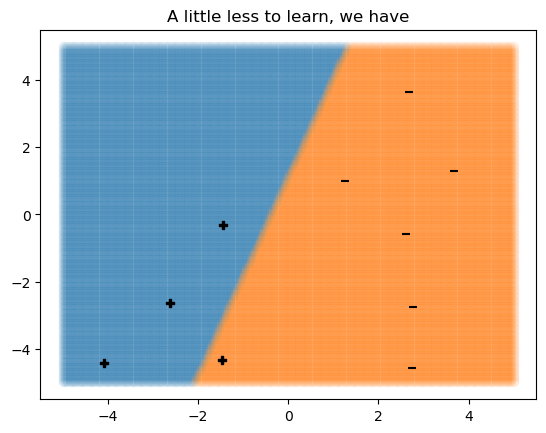

In [14]:
plot_boundary(w,X=X,y=y,title="A little less to learn, we have")

### Epochs

You can see that one pass through the training data did not suffice to train ${\bf w}$.

This is common.

In ML we call one pass through the data an "epoch".

Many learning algorithms require many epochs for training.



In [15]:
## Manual PLA, A second epoch
eta = 0.1
for x,y_i in zip(X,y):
    yhat = phi(w.T@x)
    dw_0 = eta*(y_i-yhat)*x[0]
    dw_1 = eta*(y_i-yhat)*x[1]
    dw_2 = eta*(y_i-yhat)*x[2]
    
    w[0] += dw_0
    w[1] += dw_1
    w[2] += dw_2
    

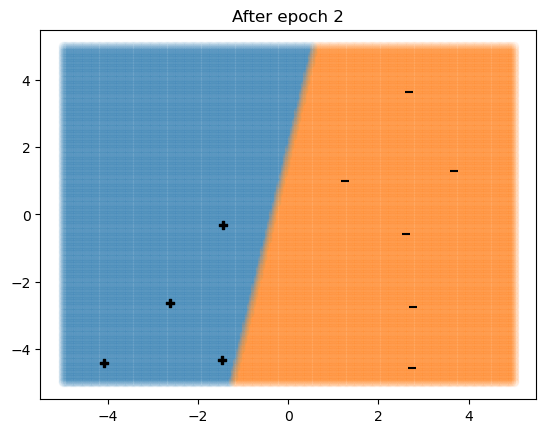

In [16]:
plot_boundary(w,X=X,y=y,title="After epoch 2")

### Success

You can see that training error goes to zero after the second epoch.

Note that this is not really the best boundary suggested by the data.

But the PLA is primitive and does not find the "best" boundary.

It just finds **a** boundary that makes training error go to zero (when the data is linearly separable).



### Why does the PLA work?

Let us think about what the PLA does and try to figure out why it works.

For simplicity we will assume $\eta = 1$.

The first thing to observe is that if ${\bf x}^{(i)}$ is classified *correctly* then $\Delta w_j = 0$ for all $j=0,1,\ldots,d$.

**Proof**:  If the classification is correct, then $\hat{y}=y$, and $$\Delta w_j = (y^{(i)}-\hat{y}^{(i)})x^{(i)}_j = 0.$$

Therefore **correctly classified points ${\bf x}^{(i)}$ do not cause ${\bf w}$ to change**.

But now suppose that ${\bf x}^{(i)}$ *is* misclassied.  There are two cases.

**Case 1** $y^{(i)} = 1$

In this case $\hat{y}^{(i)} = -1$, and $\Delta w_j = (y^{(i)}-\hat{y}^{(i)})x^{(i)}_j = 2x^{(i)}_j.$

Note that this will cause $\hat{y}^{(i)}={\bf w}^Tx^{(i)}$ to become *more positive* (or move towards being positive).  This will help $\hat{y}^{(i)}$ flip to become 1.

**Case 2** $y^{(i)} = -1$

In this case $\hat{y}^{(i)} = 1$, and $\Delta w_j = (y^{(i)}-\hat{y}^{(i)})x^{(i)}_j = -2x^{(i)}_j.$

Note that this will cause $\hat{y}^{(i)}={\bf w}^Tx^{(i)}$ to become *more negative* (or move towards being negative).
This will help $\hat{y}^{(i)}$ flip to become -1.




### Real data is not always linearly separable

As an assignment you will implement the PLA and use it with real data.  

When you do that, you will probably get data that is not linearly separable.

There are a couple of problems that arise.

1. The PLA will never terminate (if the quitting condition is zero training error).

This problem is easy to fix. We just set the PLA to run for a maximum number of epochs (eg 100 epochs).  After that, it quits.

But this leads to 2:

2. The PLA will thrash around and at termination the current $\bf{w}$ may not be very good.

There is also a nice easy solution to problem (2):  Just keep track of the best $\bf{w}$ that you have ever seen.  When `max epochs` is reached and the PLA terminates, return the best $\bf{w}$ seen so far. 

This is sometimes called the **pocket algorithm** (because the best ${\bf w}$ is "in our pocket"). 


